In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

## Load Population Data

In [2]:
populations = pd.read_csv("../data/raw/population_ages.csv", thousands=',', index_col="OA11CD")
populations.columns = populations.columns.astype(int)
print("Nrows in population data", len(populations))
populations.head()

Nrows in population data 8802


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
OA11CD,,,,,,,,,,,,,,,,,,,,,
E00041378,4,1,3,1,5,2,4,1,0,2,...,2,2,2,1,2,0,0,0,0,1
E00041381,1,2,2,2,3,0,0,4,4,4,...,1,0,0,0,0,1,0,0,1,0
E00041382,3,2,0,0,0,1,0,0,0,0,...,0,3,3,0,1,1,0,0,0,0
E00041383,1,3,1,5,3,3,3,2,3,1,...,3,1,2,3,3,0,0,0,0,1
E00041386,10,15,11,12,7,6,7,3,4,2,...,0,0,0,0,0,0,0,0,0,0


## Load OA Data

In [3]:
tyne_oa = gpd.read_file("../data/processed/tyne_oa")
tyne_oa.set_index("oa11cd", inplace=True)
print("Nrows in OA data:", len(tyne_oa))
tyne_oa.head()

Nrows in OA data: 952


,lad11cd,X,Y,Population,geometry
oa11cd,,,,,
E00042042,E08000021,421259.393,564639.754,310,"POLYGON ((421301.772 564928.429, 421301.755 56..."
E00042043,E08000021,420448.616,564819.213,304,"POLYGON ((420572.364 564892.821, 420572.312 56..."
E00042044,E08000021,420509.207,564622.209,246,"POLYGON ((420492.559 564780.806, 420492.590 56..."
E00042045,E08000021,421551.722,564088.460,201,"POLYGON ((421543.715 563955.116, 421542.251 56..."
E00042046,E08000021,422116.597,563648.529,424,"POLYGON ((422650.214 563568.422, 422650.020 56..."


## Filter Population Data

Only keep data for OAs in OA data.

In [4]:
print("Nrows before filtering:", len(populations))
populations = populations[populations.index.isin(tyne_oa.index)]
print("Nrows after filtering:", len(populations))

Nrows before filtering: 8802
Nrows after filtering: 952


## Give Weights to Different Ages

Text(0, 0.5, 'Weight')

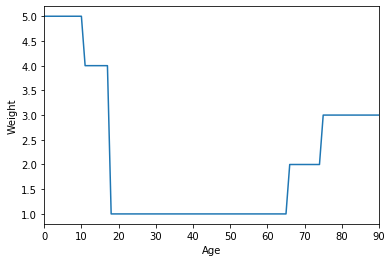

In [5]:
weights = pd.Series(1, index=populations.columns)

weights[weights.index<18] = 4
weights[weights.index<11] = 5
weights[weights.index>65] = 2
weights[weights.index>=75] = 3

weights.plot()
plt.xlabel("Age")
plt.ylabel("Weight")

## Apply Weights to OA Populations

In [6]:
oa_pop_weight_age = populations*weights
oa_pop_weight_age.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
OA11CD,,,,,,,,,,,,,,,,,,,,,
E00042044,15,25,0,5,10,5,25,15,10,10,...,9,3,3,3,6,0,3,3,0,3
E00042052,40,20,15,20,20,15,15,20,15,10,...,18,3,6,9,3,9,0,9,0,6
E00042054,35,35,15,15,15,40,15,35,25,10,...,3,9,3,3,0,0,6,3,0,3
E00042055,20,10,20,20,20,25,45,25,25,15,...,0,9,0,3,3,9,6,0,0,3
E00042058,10,5,20,5,15,0,5,10,15,15,...,3,3,0,0,0,3,0,0,0,3


## Calculate Normalised Weight for Each OA

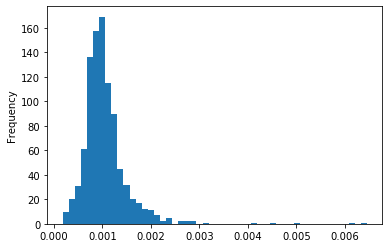

In [7]:
oa_pop_weight = oa_pop_weight_age.sum(axis=1)
oa_pop_weight = oa_pop_weight / oa_pop_weight.sum()

oa_pop_weight.plot.hist(bins=50)

Text(0, 0.5, 'OA Weight')

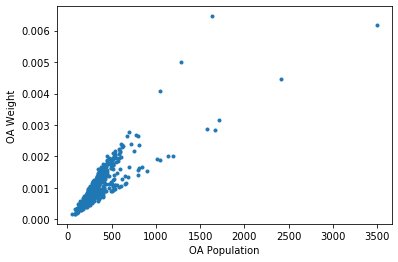

In [8]:
plt.plot(populations.sum(axis=1), oa_pop_weight, '.')
plt.xlabel('OA Population')
plt.ylabel('OA Weight')

Text(0.5, 1.0, 'E00175591')

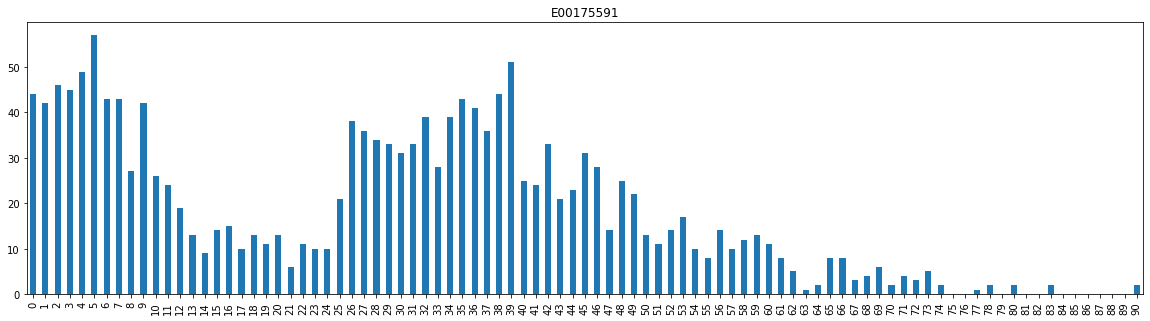

In [9]:
populations.loc[oa_pop_weight.idxmax()].plot.bar(figsize=(20,5))
plt.title(oa_pop_weight.idxmax())

Text(0, 0.5, 'Rank Age-Weighted Population')

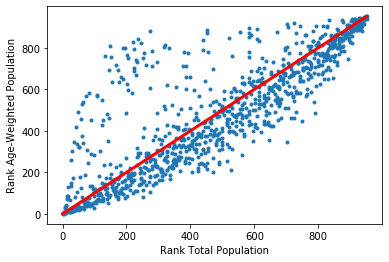

In [10]:
rank_totalpop = populations.sum(axis=1).rank(ascending=False)
rank_weightedpop = oa_pop_weight.rank(ascending=False)

ranks = pd.DataFrame({"poptotal": rank_totalpop,
                      "popweighted": rank_weightedpop})


plt.plot(ranks["poptotal"], ranks["popweighted"], '.')
plt.plot(range(len(populations)), range(len(populations)), linewidth=3, color='r')
plt.xlabel("Rank Total Population")
plt.ylabel("Rank Age-Weighted Population")

In [11]:
print("Total population:")
display(populations.sum(axis=1).nlargest(10))

print("Age-Weighted population:")
display(oa_pop_weight.nlargest(10))

Total population:


OA11CD
E00042820    3492
E00042672    2408
E00042580    1707
E00175578    1662
E00175591    1638
E00042669    1576
E00175572    1285
E00175593    1191
E00175584    1141
E00042147    1048
dtype: int64

Age-Weighted population:


OA11CD
E00175591    0.006456
E00042820    0.006178
E00175572    0.004991
E00042672    0.004466
E00042147    0.004093
E00042580    0.003163
E00042669    0.002876
E00175578    0.002842
E00042262    0.002776
E00043549    0.002690
dtype: float64

## Load Place of Work Data

In [12]:
workplace = pd.read_csv("../data/raw/placeofwork_country.csv", index_col="OA11CD", thousands=",")
workplace = workplace["workers"]
workplace = workplace[workplace.index.isin(tyne_oa.index)]

workplace.head()

OA11CD
E00042067       5
E00042068     187
E00042082    1014
E00042083       7
E00042084      12
Name: workers, dtype: int64

150 OAs have weight > 0.001


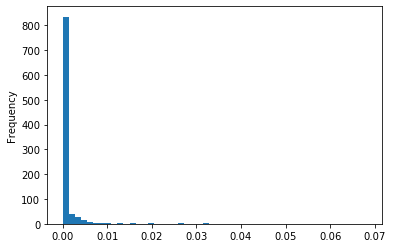

In [13]:
oa_work_weight = workplace / workplace.sum()

oa_work_weight.plot.hist(bins=50)
print((oa_work_weight>0.001).sum(), "OAs have weight > 0.001")

Text(0, 0.5, 'Rank Workers')

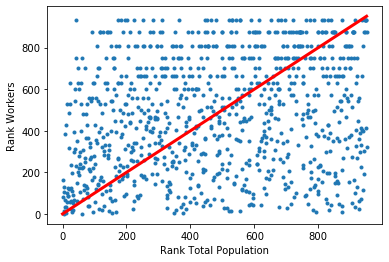

In [14]:
rank_workplace = oa_work_weight.rank(ascending=False)
ranks["workplace"] = rank_workplace

plt.plot(ranks["poptotal"], ranks["workplace"], '.')
plt.plot(range(len(populations)), range(len(populations)), linewidth=3, color='r')
plt.xlabel("Rank Total Population")
plt.ylabel("Rank Workers")

## Combine Weights

In [63]:
work_weight = 0.5
pop_weight = 0.5

oa_all_weights = pd.DataFrame({"population": oa_pop_weight, "workplace": oa_work_weight})
oa_all_weights["total"] = work_weight*oa_all_weights["workplace"] + pop_weight*oa_all_weights["population"]
oa_all_weights["total"] = oa_all_weights["total"] / oa_all_weights["total"].sum()

Text(0, 0.5, 'Rank Final Weight')

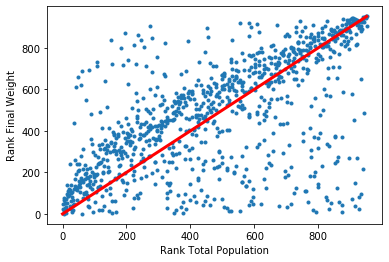

In [64]:
rank_weight = oa_all_weights["total"].rank(ascending=False)
ranks["total"] = rank_weight

plt.plot(ranks["poptotal"], ranks["total"], '.')
plt.plot(range(len(populations)), range(len(populations)), linewidth=3, color='r')
plt.xlabel("Rank Total Population")
plt.ylabel("Rank Final Weight")

## Plot

In [65]:
import contextily as ctx

tyne_oa["weight_total"] = oa_all_weights["total"]
tyne_oa["weight_population"] = oa_all_weights["population"]
tyne_oa["weight_workplace"] = oa_all_weights["workplace"]

density = False
if density:
    area = tyne_oa.geometry.area
    tyne_oa["weight_total"] = tyne_oa["weight_total"] / area
    tyne_oa["weight_population"] = tyne_oa["weight_population"] / area
    tyne_oa["weight_workplace"] = tyne_oa["weight_workplace"] / area

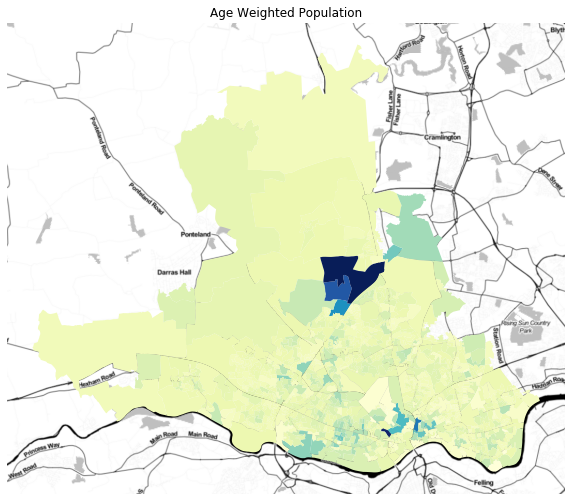

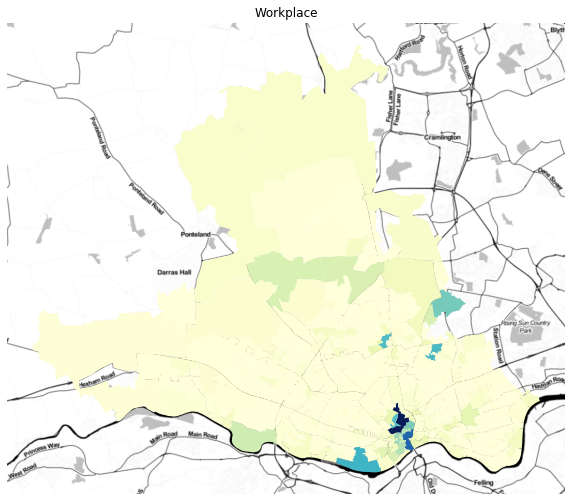

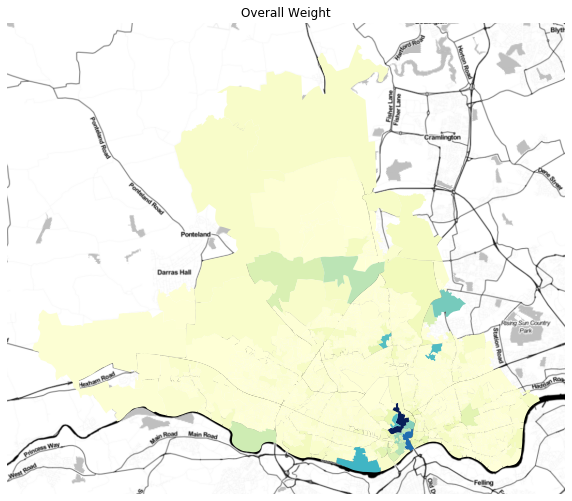

In [66]:
ax = tyne_oa.plot(column="weight_population",
                  figsize=(10,10),alpha=1,
                  cmap="YlGnBu")

ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)
plt.title("Age Weighted Population")
ax.set_axis_off()


ax = tyne_oa.plot(column="weight_workplace",
                  figsize=(10,10),alpha=1,
                  cmap="YlGnBu", legend=False)

ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)
plt.title("Workplace")
ax.set_axis_off()


ax = tyne_oa.plot(column="weight_total",
                  figsize=(10,10),alpha=1,
                  cmap="YlGnBu", legend=False)

ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)
plt.title("Overall Weight")
ax.set_axis_off()